In [1]:
import ase.io
import numpy as np
import matplotlib.pyplot as plt

import chemiscope
from loader.loader import load_data
from feature_utils.parallel import get_features_in_parallel, get_optimal_radial_basis_hypers_parallel
from rascal.representations import SphericalInvariants as SOAP

import json

import numpy as np
from sklearn.metrics import mean_squared_error
from joblib import load 
from sklearn.decomposition import PCA
from skcosmo.decomposition import PCovR
from skcosmo.preprocessing import StandardFlexibleScaler as SFS



In [ ]:
for species,ident in zip(reversed([1,6,7,8]),reversed(["1H","13C","15N","17O"])):
    train_structures, test_structures, train_properties, test_properties = load_data("../../make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors.xyz", \
                                                                                        "../../make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors.xyz",selected_species=species)

    #hypers = get_optimal_radial_basis_hypers_parallel(hypers,train_structures,expanded_max_radial=20)
    with open("../../../ShiftML-Light/data/RR_this_work_models/hypers/{}_hypers.json".format(species)) as fg:
        hypers = json.load(fg)

    Xtrain = get_features_in_parallel(train_structures,SOAP,hypers)
    Xtest = get_features_in_parallel(test_structures,SOAP,hypers)
    
    pca = PCA(n_components=2,)
    x_scaler = SFS()
    Xtrain_scaled = x_scaler.fit_transform(Xtrain)
    X_pca = pca.fit_transform(Xtrain_scaled)
    
    #save PCAs
    np.save("specie_{}_PCA_v2.npy".format(species),X_pca)
    
    pcov = PCovR(n_components=2)
    truth = np.load("../../uncertainty/multi_ridge_v2/{}_reference_shifts.npy".format(ident))
    pred = np.vstack([ np.load("../../uncertainty/multi_NN_v2/specie_{}_model_no_{}_predictions_train_complete.npy".format(species,i)) for i in range(16)]).T.mean(axis=1)
    error = np.abs(truth-pred)
    y_scaler = SFS()
    errors_scaled = y_scaler.fit_transform(error.reshape(-1,1))
    
    pcov = PCovR(n_components=2)
    X_pcov = pcov.fit_transform(Xtrain_scaled,errors_scaled)
    np.save("specie_{}_PCov_v2.npy".format(species),X_pcov)
    
    
    
    
#structure_groups = atom_groups_by_frame(train_structures)

In [4]:
for species,ident in zip(reversed([1,6,7,8]),reversed(["1H","13C","15N","17O"])):
    train_structures, test_structures, train_properties, test_properties = load_data("../../make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors.xyz", \
                                                                                        "../../make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors.xyz",selected_species=species)

    #hypers = get_optimal_radial_basis_hypers_parallel(hypers,train_structures,expanded_max_radial=20)
    with open("../../uncertainty/multi_ridge_v1/specie_{}_model_no_15_hypers.json".format(species)) as fg:
        hypers = json.load(fg)

    Xtrain = get_features_in_parallel(train_structures,SOAP,hypers)
    Xtest = get_features_in_parallel(test_structures,SOAP,hypers)
    
    pca = PCA(n_components=2,)
    x_scaler = SFS()
    Xtrain_scaled = x_scaler.fit_transform(Xtrain)
    X_pca = pca.fit_transform(Xtrain_scaled)
    
    #save PCAs
    np.save("specie_{}_PCA_v1.npy".format(species),X_pca)
    
    pcov = PCovR(n_components=2)
    truth = np.load("../../uncertainty/multi_ridge_v2/{}_reference_shifts.npy".format(ident))
    pred = np.vstack([ np.load("../../uncertainty/multi_NN_v1/specie_{}_model_no_{}_predictions_train_complete.npy".format(species,i)) for i in range(16)]).T.mean(axis=1)
    error = np.abs(truth-pred)
    y_scaler = SFS()
    errors_scaled = y_scaler.fit_transform(error.reshape(-1,1))
    
    pcov = PCovR(n_components=2)
    X_pcov = pcov.fit_transform(Xtrain_scaled,errors_scaled)
    np.save("specie_{}_PCov_v1.npy".format(species),X_pcov)

In [35]:
for species,ident in zip(reversed([1,6,7,8]),reversed(["1H","13C","15N","17O"])):
    print(species, ident)

8 17O
7 15N
6 13C
1 1H


In [3]:
Xtrain.shape

(103912, 8640)

In [ ]:
X_pca.shape

In [6]:
pca.explained_variance_

array([0.22993268, 0.16132866])

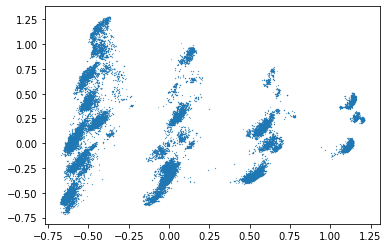

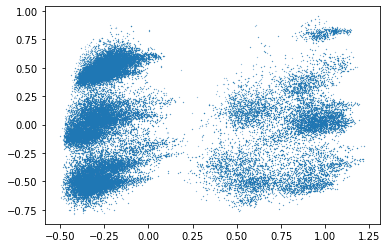

In [7]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=0.01)

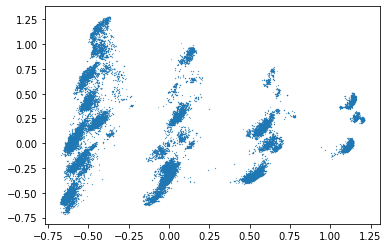

In [27]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=0.01)

In [29]:
chemiscope.write_input(
    path="chemiscope.json.gz",
    frames=train_structures,
    environments=chemiscope.librascal_atomic_environments(train_structures,cutoff=hypers["interaction_cutoff"]),
    properties={
        "SOAP PCA": X_pcov,
        "NMR errors": error
    },
    settings={"map": {"color": {"property": "NMR errors"}}}
)

In [ ]:
chemiscope.write_input(
    
    frames=frames,
    properties=properties,
    # This is required to display properties with `target: "atom"`
    environments=chemiscope.all_atomic_environments(frames),
)


In [22]:

len(chemiscope.librascal_atomic_environments(train_structures,cutoff=hypers["interaction_cutoff"]))

103912

In [6]:
pcov = PCovR(n_components=2)
truth = np.load("../uncertainty/multi_ridge_v2/13C_reference_shifts.npy")
pred = np.vstack([ np.load("../uncertainty/multi_NN_v2/specie_6_model_no_{}_predictions_train_complete.npy".format(i)) for i in range(16)]).T.mean(axis=1)
error = np.abs(truth-pred)
y_scaler = SFS()
errors_scaled = y_scaler.fit_transform(error.reshape(-1,1))


In [7]:
X_pcov = pcov.fit_transform(Xtrain_scaled,errors_scaled)

In [8]:
np.save("PCov_train_1_train.npy",X_pcov)


In [ ]:
Xtrain_scaled

In [21]:
mean_squared_error(truth,pred,squared=False)

1.3647979283942708

NameError: name 'pcov' is not defined

In [11]:
pretrained_model = load("../../ShiftML-Light/data/RR_this_work_models/1_RR.joblib")

In [12]:
pcov = PCovR(n_components=2)
X_pcov = pcov.fit_transform(Xtrain,error)


ValueError: Found input variables with inconsistent numbers of samples: [103912, 134692]

(-1.1, 0.75)

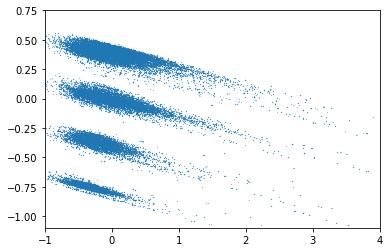

In [18]:
plt.scatter(X_pcov[:,0],X_pcov[:,1],s=0.01)
plt.xlim(-1,4)
plt.ylim(-1.1,0.75)

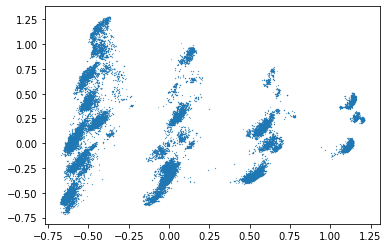

In [19]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=0.01)

In [ ]:
    hypers = dict(soap_type="PowerSpectrum",
                  interaction_cutoff=6.016,
                  max_radial=8,
                  max_angular=8,
                  gaussian_sigma_constant=0.259,
                  gaussian_sigma_type="Constant",
                  radial_basis="GTO",
                  normalize=True,
                  cutoff_smooth_width=0.3,
                  cutoff_function_type="RadialScaling",
                  optimization=
                        dict(
                                Spline=dict(
                                   accuracy=1.0e-05
                                )
                            ),
                  cutoff_function_parameters= dict(rate=1.587,
                        scale= 2.514,
                        exponent=4.564
                            ),
                  compute_gradients=False,
                  expansion_by_species_method="user defined",
                  global_species=[1, 6, 7, 8, 16]
                  )

## Write chemiscope files

In [8]:
for specie, ident in zip([1,6,7,8],["1H","13C","15N","17O"]):
    train_structures, test_structures, train_properties, test_properties = load_data("../../make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors.xyz", \
                                                                                        "../../make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors.xyz",selected_species=specie)
    X_pcov_v1 =  np.load("specie_{}_PCov_v1.npy".format(specie))
    X_pca_v1 = np.load("specie_{}_PCA_v1.npy".format(specie))
    X_pcov_v2 =  np.load("specie_{}_PCov_v2.npy".format(specie))
    X_pca_v2 = np.load("specie_{}_PCA_v2.npy".format(specie))
    
    truth = np.load("../../uncertainty/multi_ridge_v2/{}_reference_shifts.npy".format(ident))
    pred_v2 = np.vstack([ np.load("../../uncertainty/multi_NN_v1/specie_{}_model_no_{}_predictions_train_complete.npy".format(specie,i)) for i in range(16)]).T.mean(axis=1)
    pred_v1 = np.vstack([ np.load("../../uncertainty/multi_ridge_v1/specie_{}_model_no_{}_full_test_pred.npy".format(specie,i)) for i in range(16)]).T.mean(axis=1)
    error = np.abs(truth-pred_v2)
    error_v1 = np.abs(truth-pred_v1)
                         
    
    chemiscope.write_input(
    path="{}_chemiscope.json.gz".format(specie),
    frames=train_structures,
    environments=chemiscope.librascal_atomic_environments(train_structures,cutoff=hypers["interaction_cutoff"]),
    properties={
        "SOAP PCoV v1": X_pcov_v1,
        "SOAP PCA v1": X_pca_v1,
        "SOAP PCoV v2": X_pcov_v2,
        "SOAP PCA v2": X_pca_v2,
        "NMR errors v2 NN": error,
        "NMR errors v1 RR": error_v1,
    },
    settings={"map": {"color": {"property": "NMR errors v2 NN"}}}
)
    
    
    